In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="F01SpS6qFNLLAcRHdtEm")
project = rf.workspace("eye-gaze-uu2bc").project("eye-gaze-fhinc")
version = project.version(2)
dataset = version.download("yolov11")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.1/83.1 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 19.3 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to eye-gaze-2 in yolov11:: 100%|██████████| 176/176 [00:00<00:00, 4548.32it/s]


In [ ]:
!pip install ultralytics

# Import YOLO class
from ultralytics import YOLO

# Train YOLOv10
!yolo task=detect mode=train model=yolov9s.pt data=/content/eye-gaze-2/data.yaml epochs=100 imgsz=640 plots=True


Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov9s.pt, data=/content/eye-gaze-2/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_

In [ ]:
# Load the trained YOLOv9 model
model = YOLO("/content/runs/detect/train2/weights/best.pt")  # Path to your trained model


results = model("/content/WIN_20250213_21_57_56_Pro.jpg", save=True, show=True)

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()


image 1/1 /content/WIN_20250213_21_57_56_Pro.jpg: 384x640 1 right, 64.1ms
Speed: 3.7ms preprocess, 64.1ms inference, 155.6ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict


In [ ]:
# Load trained model
model = YOLO('/content/runs/detect/train2/weights/best.pt')

# Get validation results
metrics = model.val()

# Extract mAP50 for all classes and compute overall accuracy
overall_accuracy = metrics.box.map50
print(f"Overall Accuracy (mAP50): {overall_accuracy:.4f}")


Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv9s summary (fused): 486 layers, 7,169,023 parameters, 0 gradients, 26.7 GFLOPs


val: Scanning /content/eye-gaze-2/valid/labels.cache... 15 images, 0 backgrounds, 0 corrupt: 100%|██████████| 15/15 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.27s/it]


                   all         15         15      0.747      0.827      0.908      0.545
                center          3          3          1      0.965      0.995      0.749
                  down          3          3      0.877      0.667      0.913      0.385
                  left          3          3      0.585      0.503       0.83      0.506
                 right          3          3      0.411          1      0.806      0.471
                    up          3          3      0.861          1      0.995      0.613
Speed: 0.2ms preprocess, 34.7ms inference, 0.0ms loss, 4.6ms postprocess per image
Results saved to runs/detect/val
Overall Accuracy (mAP50): 0.9078


No positive samples in y_true, true positive value should be meaningless


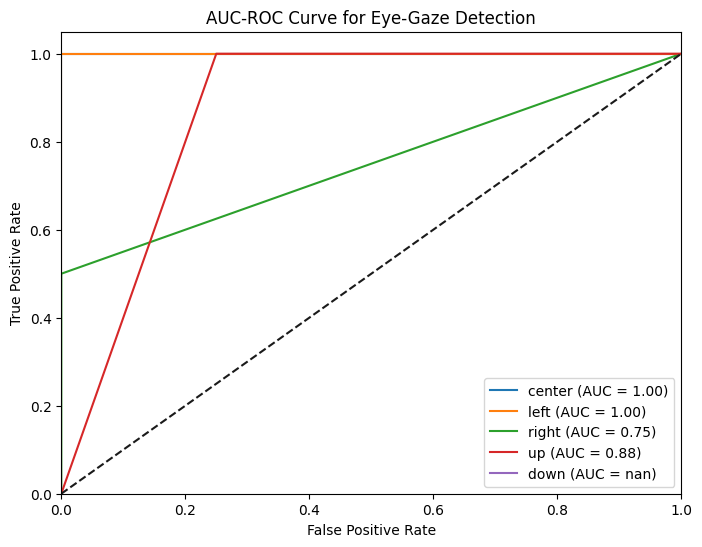

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from ultralytics import YOLO

# Load the trained YOLOv9 model
model = YOLO("/content/runs/detect/train2/weights/best.pt")  # Replace with your trained model path

# Define class labels (eye gaze directions)
class_labels = ["center", "left", "right", "up", "down"]  # Modify if needed

# Simulated true labels and predictions (Replace with actual data)
true_labels = ["center", "left", "right", "right", "up"]  # Example ground truth labels
predicted_labels = ["center", "left", "right", "up", "up"]  # Example predicted labels

# Convert to numerical labels
true_labels_encoded = [class_labels.index(label) for label in true_labels]
predicted_labels_encoded = [class_labels.index(label) for label in predicted_labels]

# One-hot encode the labels for multi-class ROC
y_true = label_binarize(true_labels_encoded, classes=np.arange(len(class_labels)))
y_pred = label_binarize(predicted_labels_encoded, classes=np.arange(len(class_labels)))

# Compute ROC curve and AUC for each class
plt.figure(figsize=(8, 6))
for i, label in enumerate(class_labels):
    fpr, tpr, _ = roc_curve(y_true[:, i], y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{label} (AUC = {roc_auc:.2f})")

# Plot styling
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC-ROC Curve for Eye-Gaze Detection")
plt.legend(loc="lower right")
plt.show()
